In [76]:
#import libraries that may be needed in the course of the work
import pandas as pd
import numpy as np
import math
import datetime as datetime
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import calendar
from datetime import timedelta

%matplotlib inline

In [4]:
#A young Russian publisher established in 2017 by the true fans of their craft. 
#In five years, we've popularized Russian comics and attracted new readers into the industry. 
#It was achieved because of the product's high quality, different approach towards working with stories and characters, 
#as well as attracting the audience of media people (bloggers and different musicians) to MOLOT HARDCORP comics.

#MOLOT HARDCORP has a website where is selling their own products B2C. 
#There is a small and simple CRM that gather some neccessary info for delivery. The output from the CRM is a csv.file. 
# Let's look at this info and decide what we can do with it.


In [5]:
#open csv.file from CRM
customers = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-i-levin/molot_hardcorp/purchases_of_molot_2.csv', sep=';', error_bad_lines=False)

In [6]:
#look at all columns
customers.columns

Index(['Email', 'Name', 'Phone', 'Date', 'Адрес_доставки', 'Регион_доставки',
       'Checkbox', 'Checkbox_2', 'Индекс_доставки', 'Статус оплаты',
       'Название формы', 'Номер заказа', 'Комментарий_к_заказу',
       'comment_form', 'Трек-код', 'delivery', 'Delivery_adress',
       'Сумма заказа', 'Промокод', 'externalid', 'task', 'data_processing',
       'adv', 'ages', 'Region', 'Promocode', 'street', 'city', 'Country',
       'tranid', 'formid', 'formname', 'paymentsystem', 'utm_content',
       'Status ID', 'Stage'],
      dtype='object')

In [7]:
#convert the column names to the appropriate format
customers.columns = customers.columns.str.lower()
customers.columns

Index(['email', 'name', 'phone', 'date', 'адрес_доставки', 'регион_доставки',
       'checkbox', 'checkbox_2', 'индекс_доставки', 'статус оплаты',
       'название формы', 'номер заказа', 'комментарий_к_заказу',
       'comment_form', 'трек-код', 'delivery', 'delivery_adress',
       'сумма заказа', 'промокод', 'externalid', 'task', 'data_processing',
       'adv', 'ages', 'region', 'promocode', 'street', 'city', 'country',
       'tranid', 'formid', 'formname', 'paymentsystem', 'utm_content',
       'status id', 'stage'],
      dtype='object')

In [8]:
customers = customers.rename(columns={'адрес_доставки' : 'adress_rus',
                                     'регион_доставки' : 'region_del_rus',
                                      'трек-код' : 'track_number',
                                     'checkbox' : 'personal_info',
                                     'checkbox_2' : 'ads_agreement',
                                     'индекс_доставки': 'postcode',
                                     'статус оплаты' : 'payment_status',
                                     'название формы' : 'name_of_form',
                                     'номер заказа' : 'order_id',
                                     'комментарий_к_заказу' : 'comments',
                                     'сумма заказа' : 'sum_of_money',
                                     'промокод' : 'promocode_rus',
                                     'status id' : 'status_id',
                                     'street' : 'street_abroad',
                                     'city' : 'city_abroad',
                                     'country' : 'country_abroad'})

In [9]:
#There are some duplicate columns: street_abroad, city_abroad are forms at the english version of website
#At the same time adress_rus is the same form at the russian version
#Or checkbox(personal_info) and data_processing are the same functions, but in different versions of website 
#That's why we need to unite the same parametrs to the one column

In [10]:
customers.personal_info.replace(('yes', 'NaN'), (1, 0), inplace=True)
customers.personal_info = customers.personal_info.fillna(0)

In [11]:
customers.data_processing.replace(('yes', 'NaN'), (1, 0), inplace=True)
customers.data_processing = customers.data_processing.fillna(0)

In [12]:
customers['data_processing_new'] = customers.personal_info + customers.data_processing

In [13]:
customers = customers.drop(columns = ['data_processing', 'personal_info'], axis = 1) 

In [14]:
customers.ads_agreement.replace(('yes', 'NaN'), (1, 0), inplace=True)
customers.ads_agreement = customers.ads_agreement.fillna(0)
customers.adv.replace(('yes', 'NaN'), (1, 0), inplace=True)
customers.adv = customers.adv.fillna(0)

In [15]:
customers['ads_new'] = customers.adv + customers.ads_agreement
customers = customers.drop(columns = ['adv', 'ads_agreement'], axis = 1) 
customers = customers.rename(columns={'ads_new' : 'ads_agreement',
                         'data_processing_new' : 'data_processing'})

In [16]:
customers.columns

Index(['email', 'name', 'phone', 'date', 'adress_rus', 'region_del_rus',
       'postcode', 'payment_status', 'name_of_form', 'order_id', 'comments',
       'comment_form', 'track_number', 'delivery', 'delivery_adress',
       'sum_of_money', 'promocode_rus', 'externalid', 'task', 'ages', 'region',
       'promocode', 'street_abroad', 'city_abroad', 'country_abroad', 'tranid',
       'formid', 'formname', 'paymentsystem', 'utm_content', 'status_id',
       'stage', 'data_processing', 'ads_agreement'],
      dtype='object')

In [17]:
customers.country_abroad.fillna(0)

0       0
1       0
2       0
3       0
4       0
       ..
1626    0
1627    0
1628    0
1629    0
1630    0
Name: country_abroad, Length: 1631, dtype: object

In [18]:
customers.city_abroad.fillna(0)

0       0
1       0
2       0
3       0
4       0
       ..
1626    0
1627    0
1628    0
1629    0
1630    0
Name: city_abroad, Length: 1631, dtype: object

In [19]:
customers.street_abroad.fillna(0)

0       0
1       0
2       0
3       0
4       0
       ..
1626    0
1627    0
1628    0
1629    0
1630    0
Name: street_abroad, Length: 1631, dtype: object

In [20]:
customers['adress_abroad'] = customers.country_abroad + ', ' + customers.city_abroad + ', ' + customers.street_abroad

In [21]:
customers.adress_rus = customers.adress_rus.fillna(customers['adress_abroad'])

In [22]:
customers = customers.drop(columns = ['adress_abroad', 'city_abroad', 'street_abroad'], axis = 1) 

In [23]:
customers = customers.rename(columns={'adress_rus' : 'adress',
                         'country_abroad' : 'country'})

In [24]:
customers.country = customers.country.fillna('Russia')

In [25]:
customers.order_id = customers.order_id.fillna(0)

In [26]:
customers.delivery_adress = customers.delivery_adress.replace("Россия, ", "", regex=True)

In [27]:
customers.delivery_adress.value_counts()

Астраханская область, г. Астрахань, Приволжский район, село три протока, ул советская, д 1    1
Московская область, г. Мытищи, ул. Комарова д.2 к.1 кв.166 почтовый индекс 141002             1
Оренбургская область, город Новотроицк, ул. Марии Корецкой дом 20, квартира 49                1
Свердловская область, город Сысерть, микрорайон "новый", дом 34, квартира 56                  1
Пермь, ул. Революции 21а, кв. 74, 614007                                                      1
Name: delivery_adress, dtype: int64

In [28]:
customers.adress = customers.adress.fillna(customers.delivery_adress)

In [29]:
customers = customers.drop(columns = ['delivery_adress'], axis = 1) 

In [30]:
#Look at our columns and decide what we need to the subsequent analysis
#In this case we want to count next metrics: 1) dynamics of the average bill, 2) monthly revenue, 
#3)Number of unique customers, 4) loyality of customers (RFM-analysis)
customers.columns

Index(['email', 'name', 'phone', 'date', 'adress', 'region_del_rus',
       'postcode', 'payment_status', 'name_of_form', 'order_id', 'comments',
       'comment_form', 'track_number', 'delivery', 'sum_of_money',
       'promocode_rus', 'externalid', 'task', 'ages', 'region', 'promocode',
       'country', 'tranid', 'formid', 'formname', 'paymentsystem',
       'utm_content', 'status_id', 'stage', 'data_processing',
       'ads_agreement'],
      dtype='object')

In [31]:
#'status_id', 'utm_content', 'formname', 'stage', 'formid', 'delivery', 'name_of_form', 'payment_status', 'region_del_rus',
#'paymentsystem', 'promocode', 'postcode', 'track_number', 'promocode_rus', 'task', 'promocode', 'paymentsystem'
# are not helpfull for our analysis
customers = customers.drop(columns = ['status_id', 'utm_content', 'formname', 'stage', 'formid', 'delivery', 
                                     'name_of_form', 'payment_status', 'region_del_rus',
                                     'paymentsystem', 'promocode', 'postcode', 'track_number', 
                                      'promocode_rus', 'task', 'promocode', 'paymentsystem'], axis = 1) 

In [32]:
#1) Months dynamics of the average bill

In [33]:
average_bill = customers 

In [34]:
average_bill.date = pd.to_datetime(average_bill.date, format="%Y-%m")

In [35]:
average_bill.date = average_bill.date.dt.strftime('%Y-%m')

In [36]:
average_bill.columns

Index(['email', 'name', 'phone', 'date', 'adress', 'order_id', 'comments',
       'comment_form', 'sum_of_money', 'externalid', 'ages', 'region',
       'country', 'tranid', 'data_processing', 'ads_agreement'],
      dtype='object')

In [37]:
agg_average_bill = average_bill.groupby('date', as_index=False).agg({'sum_of_money' : 'sum', 'name' : 'count'}) \
                            .rename(columns={'sum_of_money' : 'sum', 'name' : 'num_clients'})

In [38]:
agg_average_bill['avg_bill'] = round(agg_average_bill['sum'] / agg_average_bill['num_clients'], 2)

In [39]:
avg = agg_average_bill['sum'].sum() / agg_average_bill['num_clients'].sum()

/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


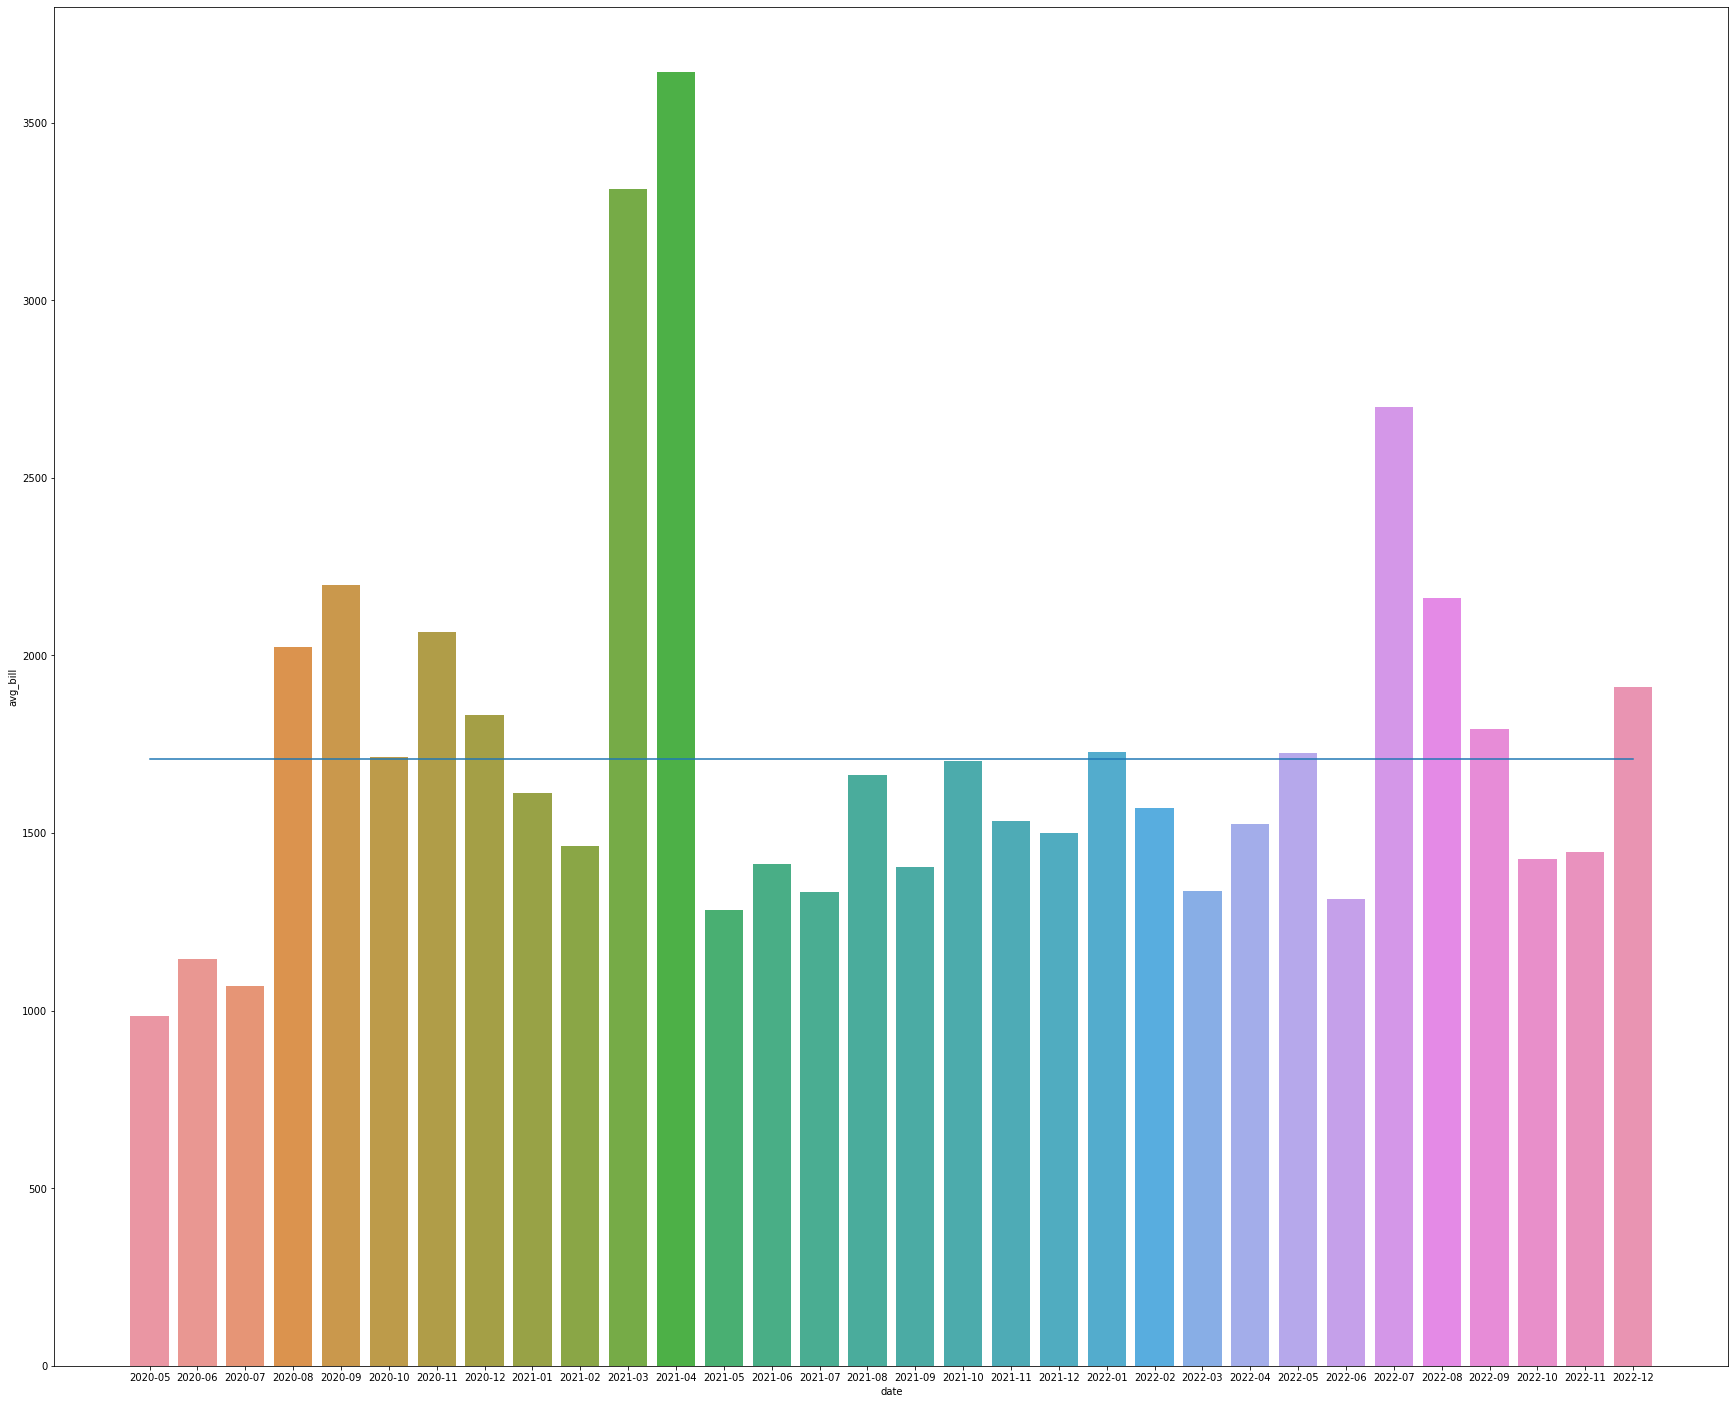

In [40]:
plt.figure(figsize=(30, 25))
sns.barplot(x='date', y='avg_bill', data=agg_average_bill)
sns.lineplot(agg_average_bill.date, avg)

In [41]:
# 2) Find a monthly revenue

In [42]:
monthly_revenue = customers.groupby('date', as_index=False).agg({'sum_of_money' : 'sum'})

/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


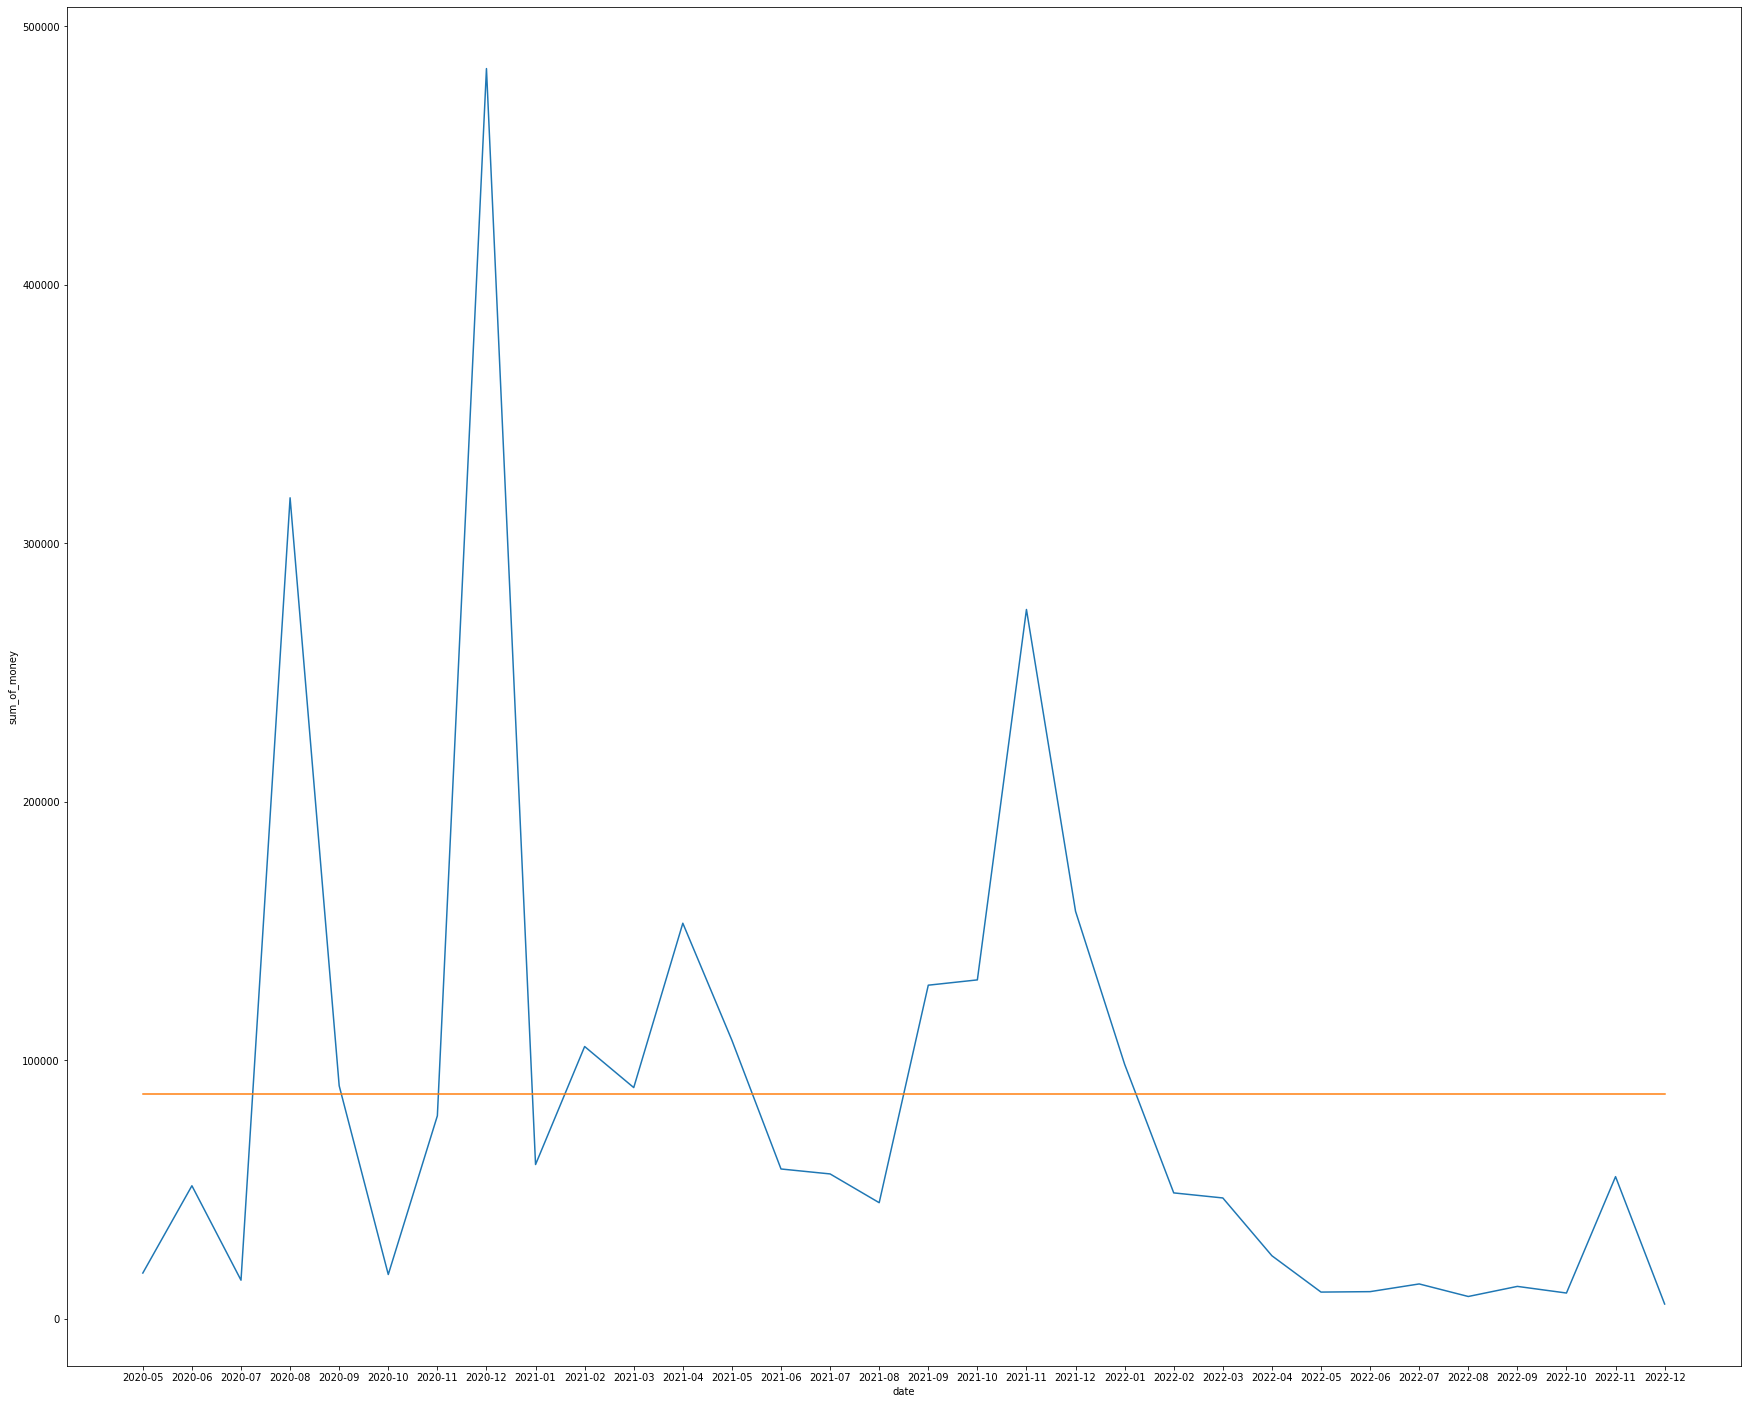

In [43]:
plt.figure(figsize=(30, 25))
sns.lineplot(data=monthly_revenue, x='date', y='sum_of_money')
sns.lineplot(monthly_revenue.date, monthly_revenue.sum_of_money.mean())

In [44]:
# 3) Find a number of unique customers

In [45]:
customers.email.nunique()

1372

In [46]:
customers.name.nunique()

1369

In [47]:
customers.phone.nunique()

1333

In [48]:
# We can see different numbers in names, emails, phones of unique customers. It could be because of mistakes during filling persol data in the cart

In [49]:
# The best way to count using a phone number because there is a special mask for the phone number in the cart on the website

In [50]:
unique_cust_phone = customers.groupby('phone', as_index=False).agg({'date' : 'count', 'sum_of_money' : 'sum'}) \
                    .sort_values('date', ascending=False) \
                    .rename(columns={'date' : 'purchases'})

In [51]:
unique_cust_phone

,phone,purchases,sum_of_money
473,+7 (916) 602-33-46,11,20015.0
1018,+7 (977) 258-09-00,9,10865.0
465,+7 (916) 465-31-30,8,8027.0
557,+7 (920) 744-74-53,7,14200.0
752,+7 (931) 581-33-07,7,13830.0
...,...,...,...
464,+7 (916) 449-08-79,1,1700.0
463,+7 (916) 444-75-50,1,1230.0
462,+7 (916) 421-5833,1,674.1
461,+7 (916) 413-54-16,1,1700.0


In [52]:
# 4) Define loyality of customers (RFM-analysis)
# R - time from the user's last purchase to the current date
# F - the total number of purchases from the user for all time
# M - amount of purchases for all time
# Determine the date of the last purchase for each customer

In [53]:
last_orders = customers.groupby('phone').agg({'date': 'max'}) \
                                        .rename(columns={'date' : 'last_order'})

In [57]:
R_customers_orders = customers.merge(last_orders, how='inner', left_on='phone', right_index=True)

In [65]:
R_customers_orders.last_order = pd.to_datetime(R_customers_orders.last_order, format='%m-%Y')

In [67]:
# Find how many months ago the last purchase was made. We will count from 12-2022

In [68]:
last_day = datetime.date(2022, 12, 1)

In [69]:
R_customers_orders['last_day'] = pd.to_datetime(last_day)

In [78]:
R_customers_orders['days_delta'] = pd.to_timedelta(R_customers_orders.last_day - R_customers_orders.last_order).dt.days

In [79]:
R_customers_orders.groupby('days_delta').agg({'phone' : 'count'}).sort_values('days_delta')

,phone
days_delta,
0,4
30,57
61,16
91,10
122,14
153,7
183,12
214,8
244,24


In [80]:
# As you can see, there are customers who last bought more than 3 years ago.
# Independently determine the boundaries for the criterion R
# from 0 to 183 days - 3 points, 183 - 365 days - 2 points, more than 365 days - 1 point

In [81]:
def function_r(R_customers_orders):
    R = 0
    if R_customers_orders["days_delta"] <=183:
        R = 3
    elif 183 < R_customers_orders["days_delta"] <=365:
        R=2
    else:
        R=1
    return (R)

In [82]:
# R criterion added to table
R_customers_orders['R'] = R_customers_orders.apply(function_r, axis=1)

In [85]:
R_customers_orders.groupby('R').agg({'phone' : 'count'}).sort_values('R')

,phone
R,
1,1184
2,319
3,120


In [87]:
# Determine the total number of purchases from the user for the entire time - F-criterion
# first, let's see what range the number of purchases lies in

In [90]:
R_customers_orders.groupby('phone', as_index=False).agg({'order_id' : 'count'}) \
    .sort_values('order_id', ascending=False) \
    .groupby('order_id', as_index=False).agg({'phone' : 'count'}) \
    .sort_values('order_id', ascending=False) \
    .rename(columns={'order_id' : 'amount_of_orders', 'phone' : 'amount_of_customers'})

,amount_of_orders,amount_of_customers
9,11,1
8,9,1
7,8,1
6,7,2
5,6,2
4,5,4
3,4,14
2,3,35
1,2,115
0,1,1158


In [91]:
# The number of user purchases varies from 1 to 11 purchases.
# Independently determine the boundaries for the criterion F
# more than 3 purchases - 3 points, 2-3 purchases - 2 points, 1 purchase - 1 point

In [92]:
F_customers_orders = customers.groupby('phone').agg({'order_id': 'count'}) \
                                        .rename(columns={'order_id' : 'amount_of_orders'}) \
                                        .sort_values('amount_of_orders', ascending=False)

In [94]:
def function_f(F_customers_orders):
    F = 0
    if F_customers_orders["amount_of_orders"] <2:
        F = 1
    elif 2 <= F_customers_orders["amount_of_orders"] <4:
        F=2
    else:
        F=3
    return (F)

In [95]:
F_customers_orders['F'] = F_customers_orders.apply(function_f, axis=1)

In [96]:
# Criteria R and F added to the table
RF_customers_orders = R_customers_orders.merge(F_customers_orders, how='inner', left_on='phone', right_index=True)

In [99]:
# Determine the amount of purchases for all time by each client M-criterion

In [101]:
total_sum = customers.groupby(['phone']).agg({'sum_of_money' : 'sum'}).sort_values('sum_of_money')

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


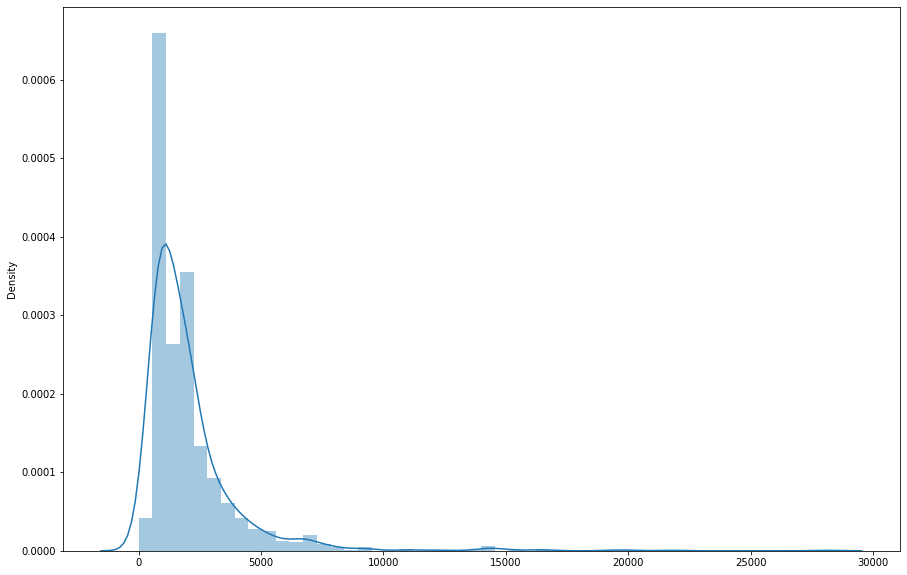

In [108]:
# look at the distribution of sums
plt.figure(figsize=(15, 10))
sns.distplot(total_sum)

In [105]:
total_sum.describe()

,sum_of_money
count,1333.000000
mean,2074.202851
std,2173.562033
min,0.000000
25%,900.000000
50%,1500.000000
75%,2300.000000
max,28000.000000


In [106]:
# it turned out the range of amounts from 0 to 28000 rubles. 
# 75% of all users paid less than 2300 rubles. median - 1500 rubles.
# use quantiles in ranking M:
# sum < 900 rubles (25% quantile) - 1 point, sum in the range 900-2300 rubles. - 2 points, more than 2300 rubles - 3 points

In [112]:
def function_m(total_sum):
    M = 0
    if total_sum["sum_of_money"] <=900:
        M = 1
    elif 900 < total_sum["sum_of_money"] < 2300:
        M=2
    else:
        M=3
    return (M)

In [113]:
total_sum['M'] = total_sum.apply(function_m, axis=1)

In [119]:
# The M criterion is added to the table. A table was obtained with all three criteria - R, F and M.
RFM = RF_customers_orders.merge(total_sum, how='inner', left_on='phone', right_index=True)

In [120]:
RFM

,email,name,phone,date,adress,order_id,comments,comment_form,sum_of_money_x,externalid,...,data_processing,ads_agreement,last_order,last_day,days_delta,R,amount_of_orders,F,sum_of_money_y,M
0,anytka222002@mail.ru,Варварюк Анна Павловна,+7 (985) 636-7975,2020-05,"Московская область, Раменский район, рабочий п...",0.000000e+00,NaN,NaN,1800.0,4,...,1.0,1.0,2020-05-01,2022-12-01,944,1,1,1,1800.0,2
1,Wolfraven412@gmail.com,Пушкарев Владимир Владимирович,+7 (924) 539-3506,2020-05,"Иркутская область, город Черемхово, пер. Коопе...",0.000000e+00,NaN,NaN,650.0,5,...,1.0,1.0,2020-05-01,2022-12-01,944,1,1,1,650.0,1
2,dudevs@bk.ru,Ледаков Алексей Дмитриевич,+7 (967) 239-8777,2020-05,"Москва, ясный проезд, дом 9, квартира 136",0.000000e+00,NaN,NaN,NaN,6,...,1.0,1.0,2020-05-01,2022-12-01,944,1,1,1,0.0,1
3,mastergerzogh@mail.ru,Войнов Владислав Дмитриевич,+7 (929) 501-1852,2020-05,"Москва, Речников 20к1 кв80",0.000000e+00,NaN,NaN,765.0,7,...,1.0,1.0,2020-05-01,2022-12-01,944,1,1,1,765.0,1
4,Xdblpax@rambler.ru,Турурушкин Алексей Владимирович,+7 (963) 995-9552,2020-05,Москва ул. Гарибальди 11 кв 473,0.000000e+00,NaN,NaN,2000.0,8,...,1.0,1.0,2020-05-01,2022-12-01,944,1,1,1,2000.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1625,berezyuk99.99@mail.ru,Березюк Евдокия Николаевна,+7 (916) 413-54-16,2022-11,"Балашиха, Мкр. Ольгино, ул Граничная 20, Кв 19",1.146666e+09,NaN,NaN,1700.0,1659,...,1.0,1.0,2022-11-01,2022-12-01,30,3,1,1,1700.0,2
1626,martik.vm@gmail.com,Мартина Вера Сергеевна,+7 (921) 352-78-35,2022-11,"Санкт-Петербург, ул. Смоленская, д. 18, кв. 53",1.772505e+09,NaN,NaN,1250.0,1660,...,1.0,0.0,2022-11-01,2022-12-01,30,3,1,1,1250.0,2
1627,rybin-o@inbox.ru,Рыбин Олег Вячеславович,+7 (900) 112-86-75,2022-11,"Тверская область, Вышний Волочек, ул. Парижско...",1.539005e+09,NaN,"Наша почта плохо работает, пожалуйста, сообщит...",2100.0,1661,...,1.0,1.0,2022-11-01,2022-12-01,30,3,1,1,2100.0,2
1628,neon.triangle@yandex.ru,Телкова Анастасия Юрьевна,+7 (985) 051-82-82,2022-12,"Московская область, Котельники, улица малая ко...",1.724148e+09,NaN,NaN,900.0,1662,...,1.0,1.0,2022-12-01,2022-12-01,0,3,1,1,900.0,1


In [121]:
# remove auxiliary columns
RFM = RFM.drop(columns=['last_day', 'days_delta', 'amount_of_orders', 'sum_of_money_y'])

In [122]:
# Make transformations to combine RFM scores
RFM.R = RFM.R.astype('str')
RFM.F = RFM.F.astype('str')
RFM.M = RFM.M.astype('str')

In [123]:
RFM.dtypes

email                      object
name                       object
phone                      object
date                       object
adress                     object
order_id                  float64
comments                   object
comment_form               object
sum_of_money_x            float64
externalid                  int64
ages                       object
region                     object
country                    object
tranid                     object
data_processing           float64
ads_agreement             float64
last_order         datetime64[ns]
R                          object
F                          object
M                          object
dtype: object

In [124]:
RFM['RFM'] = RFM.R + RFM.F + RFM.M

In [125]:
RFM

,email,name,phone,date,adress,order_id,comments,comment_form,sum_of_money_x,externalid,...,region,country,tranid,data_processing,ads_agreement,last_order,R,F,M,RFM
0,anytka222002@mail.ru,Варварюк Анна Павловна,+7 (985) 636-7975,2020-05,"Московская область, Раменский район, рабочий п...",0.000000e+00,NaN,NaN,1800.0,4,...,NaN,Russia,2035439:872220872,1.0,1.0,2020-05-01,1,1,2,112
1,Wolfraven412@gmail.com,Пушкарев Владимир Владимирович,+7 (924) 539-3506,2020-05,"Иркутская область, город Черемхово, пер. Коопе...",0.000000e+00,NaN,NaN,650.0,5,...,NaN,Russia,2035439:873944842,1.0,1.0,2020-05-01,1,1,1,111
2,dudevs@bk.ru,Ледаков Алексей Дмитриевич,+7 (967) 239-8777,2020-05,"Москва, ясный проезд, дом 9, квартира 136",0.000000e+00,NaN,NaN,NaN,6,...,NaN,Russia,2035439:874428832,1.0,1.0,2020-05-01,1,1,1,111
3,mastergerzogh@mail.ru,Войнов Владислав Дмитриевич,+7 (929) 501-1852,2020-05,"Москва, Речников 20к1 кв80",0.000000e+00,NaN,NaN,765.0,7,...,NaN,Russia,2035439:876111122,1.0,1.0,2020-05-01,1,1,1,111
4,Xdblpax@rambler.ru,Турурушкин Алексей Владимирович,+7 (963) 995-9552,2020-05,Москва ул. Гарибальди 11 кв 473,0.000000e+00,NaN,NaN,2000.0,8,...,NaN,Russia,2035439:877081572,1.0,1.0,2020-05-01,1,1,2,112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1625,berezyuk99.99@mail.ru,Березюк Евдокия Николаевна,+7 (916) 413-54-16,2022-11,"Балашиха, Мкр. Ольгино, ул Граничная 20, Кв 19",1.146666e+09,NaN,NaN,1700.0,1659,...,NaN,Russia,2035439:4026240991,1.0,1.0,2022-11-01,3,1,2,312
1626,martik.vm@gmail.com,Мартина Вера Сергеевна,+7 (921) 352-78-35,2022-11,"Санкт-Петербург, ул. Смоленская, д. 18, кв. 53",1.772505e+09,NaN,NaN,1250.0,1660,...,NaN,Russia,2035439:4029602471,1.0,0.0,2022-11-01,3,1,2,312
1627,rybin-o@inbox.ru,Рыбин Олег Вячеславович,+7 (900) 112-86-75,2022-11,"Тверская область, Вышний Волочек, ул. Парижско...",1.539005e+09,NaN,"Наша почта плохо работает, пожалуйста, сообщит...",2100.0,1661,...,NaN,Russia,2035439:4032648731,1.0,1.0,2022-11-01,3,1,2,312
1628,neon.triangle@yandex.ru,Телкова Анастасия Юрьевна,+7 (985) 051-82-82,2022-12,"Московская область, Котельники, улица малая ко...",1.724148e+09,NaN,NaN,900.0,1662,...,NaN,Russia,2035439:4056834981,1.0,1.0,2022-12-01,3,1,1,311


In [126]:
RFM.groupby('RFM').agg({'phone' : pd.Series.nunique})

,phone
RFM,
111,370
112,394
113,183
122,29
123,67
133,5
211,38
212,101
213,24


In [127]:
# now we know our customers a little bit more.
# For examplem, we can suggest loyal customers constant discounts (who has F=3)
# Or suggest something for them, who has R=2 (have not bought for a long time, but not completely lost either)
# Or give some presents to them, who spent a lot of money (M=3)